# Цель вычислительного эксперимента:
Цель эксперимента заключается в том, чтобы решить задачу классификации. Задача решается на выборке "Breast Cancer Data Set" с использованием моделей: логистической регрессии, нейронной сети, градиентного бустинга. Структурные параметры решаемой задачи: состав признаков, структура модели, количество параметров модели. Используемые критерии качества: ROC AUC, PR кривая, сложность модели.

# Описание выборок:
Используется датасет "Breast Cancer Data Set". Датасет содержит 569 образцов клеток, среди которых есть злокачественные и доброкачественные опухоли.
* В первых двух столбцах датасета хранятся уникальные идентификационные номера образцов и соответствующий диагноз (M = злокачественный, B = доброкачественный).
* Столбцы 3-32 содержат 30 реальных значений, которые были вычислены на основе оцифрованных изображений ядер клеток, которые можно использовать для построения модели, позволяющей прогнозировать, является ли опухоль доброкачественной или злокачественной.

# Блок загрузки и предобработки выборок:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

#Load libraries for data processing
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from scipy.stats import norm
import seaborn as sns # visualization

plt.rcParams['figure.figsize'] = (15,8) 
plt.rcParams['axes.titlesize'] = 'large'

# Read data
data = pd.read_csv('clean-data.csv', index_col=False)
data.drop('Unnamed: 0',axis=1, inplace=True)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
#Assign predictors to a variable of ndarray (matrix) type
array = data.values
X = array[:,1:31]
y = array[:,0]

#transform the class labels from their original string representation (M and B) into integers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

#Call the transform method of LabelEncorder on two dummy variables
#le.transform (['M', 'B'])

# График анализа состава выборки:

## Анализ выбросов, гистограмма:

In [3]:
#Break up columns into groups, according to their suffix designation 
#(_mean, _se,
# and __worst) to perform visualisation plots off. 

#For a merge + slice:
data_mean=data.loc[:,'radius_mean':'fractal_dimension_mean']
data_se=data.loc[:,'radius_se':'fractal_dimension_se']
data_worst=data.loc[:,'radius_worst':'fractal_dimension_worst']

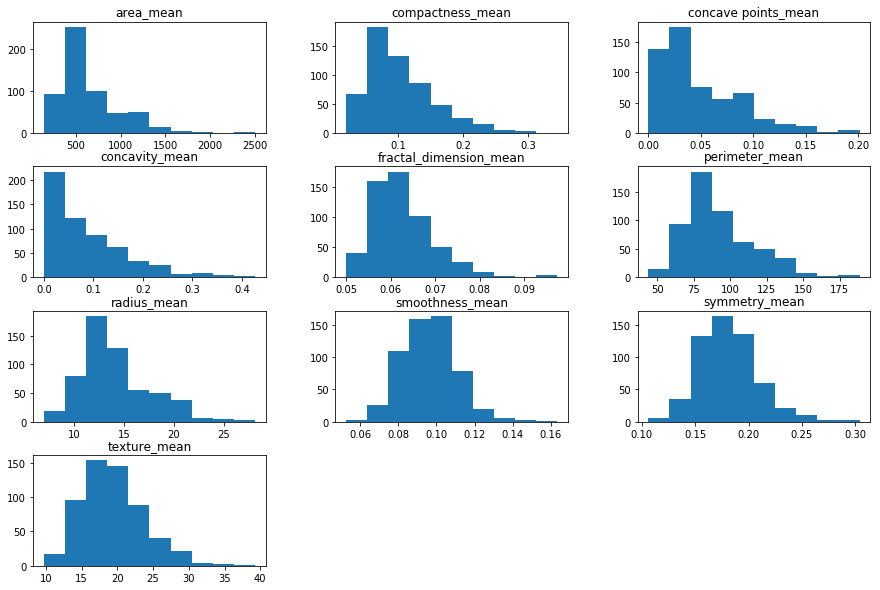

In [4]:
#Plot histograms of _mean variables
hist_mean=data_mean.hist(bins=10, figsize=(15, 10),grid=False,)

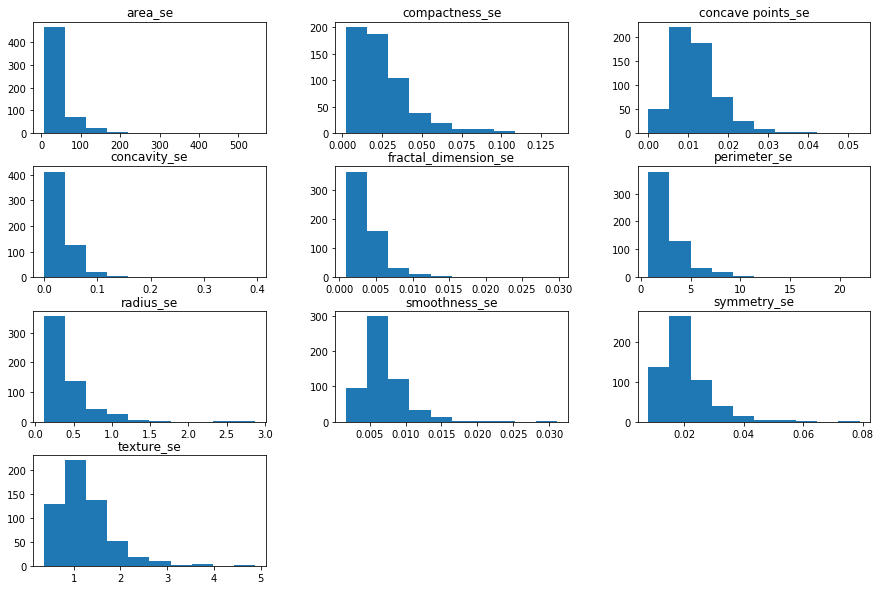

In [5]:
#Plot histograms of _se variables
hist_se=data_se.hist(bins=10, figsize=(15, 10),grid=False,)

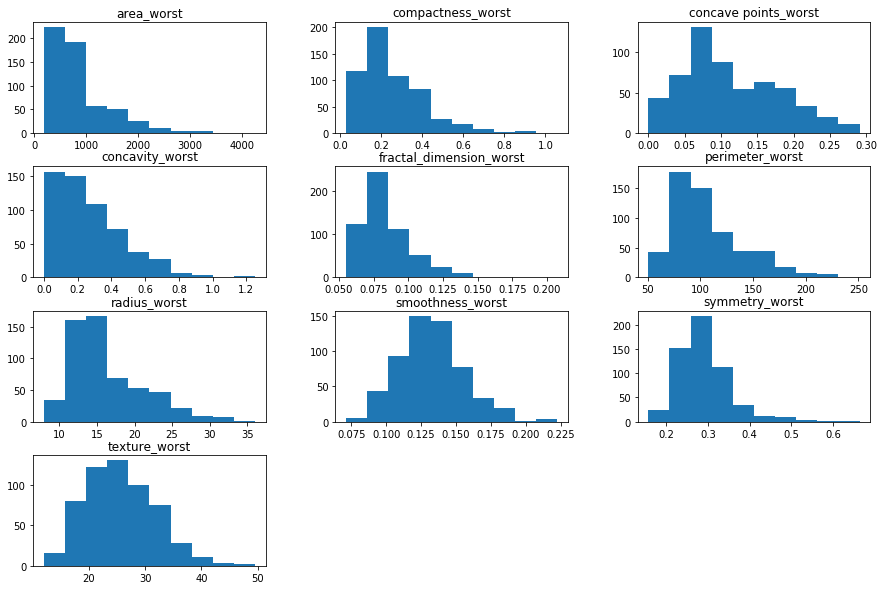

In [6]:
#Plot histograms of _worst variables
hist_worst=data_worst.hist(bins=10, figsize=(15, 10),grid=False,)

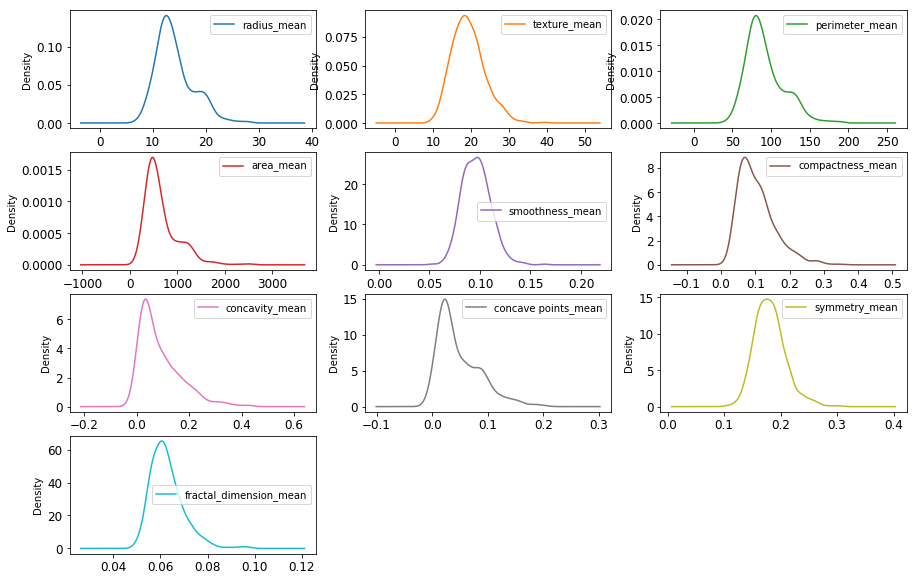

In [7]:
#Density Plots
plt = data_mean.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False, 
                     sharey=False,fontsize=12, figsize=(15,10))

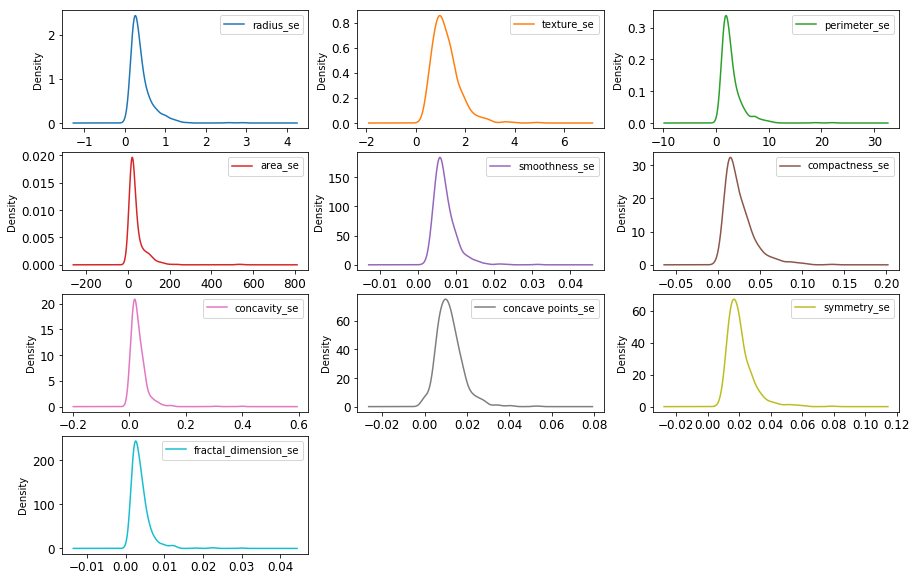

In [8]:
#Density Plots
plt = data_se.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False, 
                     sharey=False,fontsize=12, figsize=(15,10))

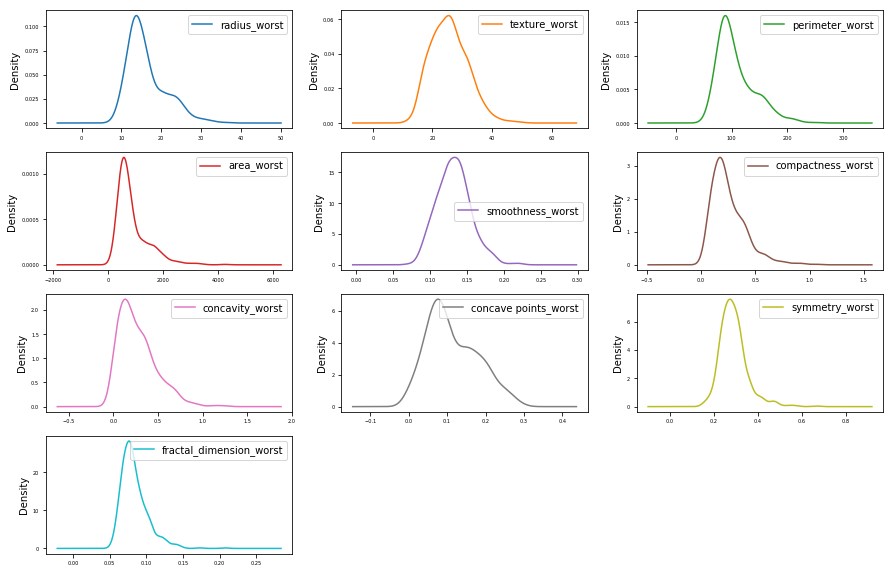

In [9]:
#Density Plots
plt = data_worst.plot(kind= 'kde', subplots=True, layout=(4,3), sharex=False, sharey=False,fontsize=5, 
                     figsize=(15,10))

* Ни в одной из гистограмм нет заметных крупных выбросов, которые требуют дальнейшей очистки.

## Анализ пропусков, статистика:

In [10]:
#basic descriptive statistics
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [11]:
data.isnull().any()

diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_di

In [12]:
data.isna().any()

diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_di

* Данная выборка не имеет пропусков.

In [13]:
# Group by diagnosis and review the output.
diag_gr = data.groupby('diagnosis', axis=0)
pd.DataFrame(diag_gr.size(), columns=['# of observations'])

,# of observations
diagnosis,
B,357
M,212


## Анализ мультикорреляции признаков, кор. матрица:

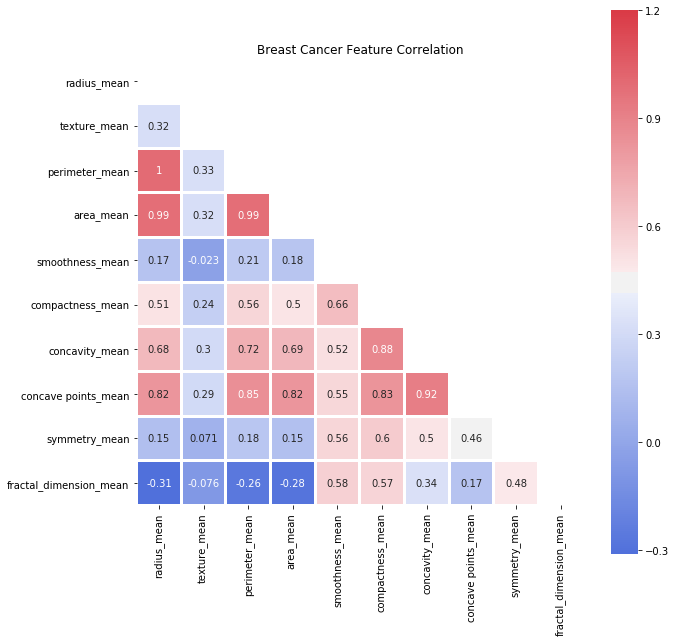

In [14]:
from matplotlib import pyplot as plt

# Compute the correlation matrix
corr = data_mean.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
data, ax = plt.subplots(figsize=(10, 10))
plt.title('Breast Cancer Feature Correlation')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1.2, square='square', cmap=cmap, mask=mask, 
            ax=ax,annot=True, fmt='.2g',linewidths=2)

Есть несколько сильно коррелирующих признаков:
* Средняя площадь ядра имеет сильную связь со средними значениями радиуса
* Некоторые признаки имеют умеренно положительную корреляцию (между 0,5-0,75): вогнутость и площадь, вогнутость и периметр и т.д.
* Мы видим сильную отрицательную корреляцию между fractal_dimension с радиусом, текстурой, периметром и площадью.

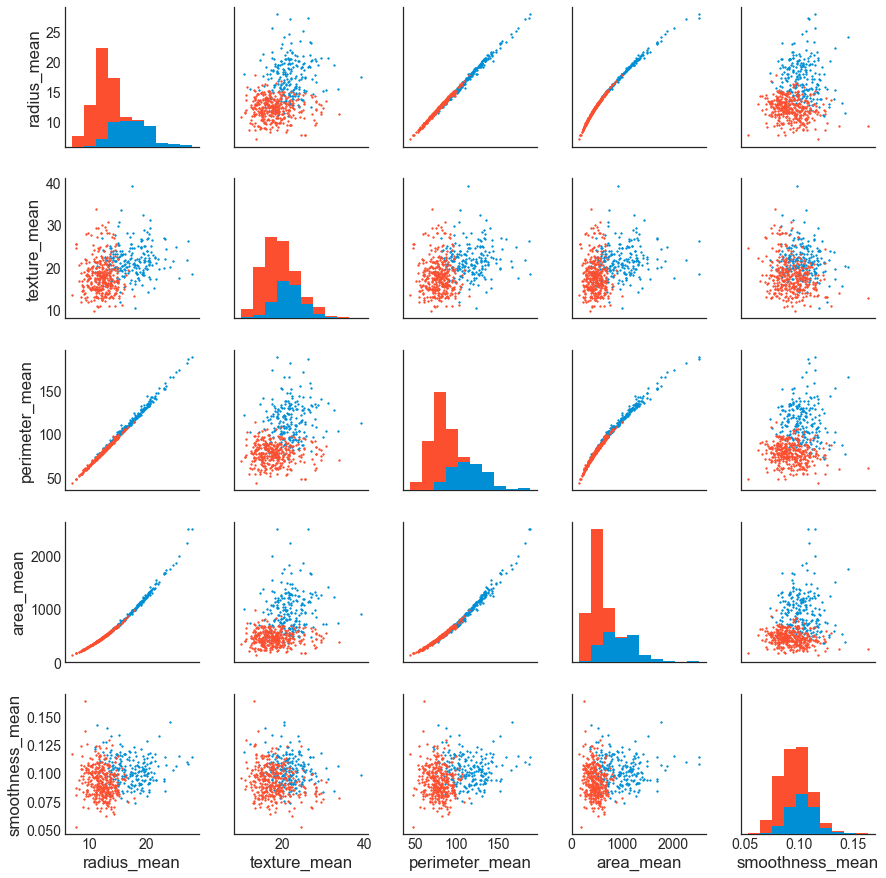

In [15]:
plt.style.use('fivethirtyeight')
sns.set_style("white")

data = pd.read_csv('clean-data.csv', index_col=False)
g = sns.PairGrid(data[[data.columns[1],data.columns[2],data.columns[3],
                     data.columns[4], data.columns[5],data.columns[6]]],hue='diagnosis' )
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter, s = 3)

* radius_mean, perimeter_mean, area_mean, compactness_mean, concavity_mean, concave_points_mean могут быть использованы для классификации рака. Большие значения этих параметров свидетельствуют о злокачественности опухоли.
* texture_mean, smoothness_mean, symmetry_mean или fractual_dimension_mean явно не показывают является ли опухоль злокачественной или нет.

# Список моделей:

Для решения поставленной задачи используются следующие модели:
* Логистическая регрессия
* Нейронная сеть
* Градиентный бустинг

# Список функций ошибки, критериев качества:

В качестве критериев качества используются:
* Точность
* ROC AUC
* PR кривая

# Способ разбиения выборки на обучение-контроль:

Возьмем 30% выборки под контроль, остальное для обучения.

In [16]:
from sklearn.model_selection import train_test_split

##Split data set in train 70% and test 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 33)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((398, 30), (398,), (171, 30), (171,))

# Обучение моделей и их анализ на разбиении обучение-контроль:

In [17]:
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['axes.titlesize'] = 36
plt.rcParams['axes.labelsize'] = 24

### Логистическая регрессия:

In [18]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn import metrics
from sklearn.preprocessing import normalize

In [19]:
classifier = LogisticRegression(class_weight='balanced')
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

parameters_grid = {
    'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
}

grid_cv = GridSearchCV(classifier, parameters_grid, scoring='accuracy', cv=cv)

In [20]:
grid_cv.fit(X_train, np.ravel(y_train))

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [21]:
best_param = grid_cv.best_params_["C"]

In [22]:
y_predicted = grid_cv.predict(X_test)

In [23]:
best_classifier = LogisticRegression(class_weight='balanced', C=best_param)
best_classifier.fit(X_train, np.ravel(y_train))

LogisticRegression(C=10000, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [24]:
y_prob = best_classifier.predict_proba(X_test)

In [25]:
metrics.accuracy_score(np.ravel(y_test), y_predicted)

0.9649122807017544

In [26]:
metrics.roc_auc_score(np.ravel(y_test), y_predicted)

0.9629870129870131

In [27]:
fpr, tpr, _ = metrics.roc_curve(np.ravel(y_test), y_prob[:, 1])

Text(0.5,1,'ROC-кривая')

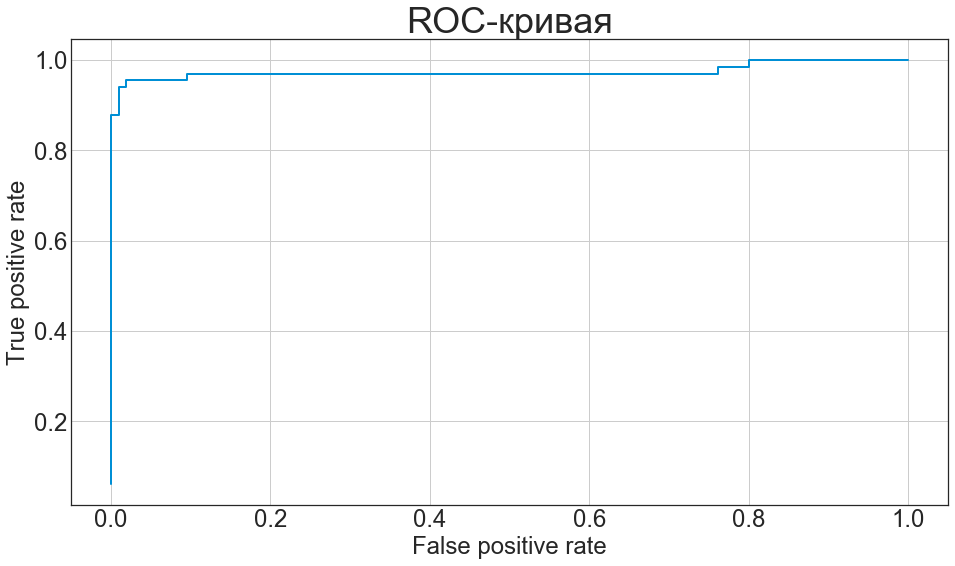

In [28]:
plt.figure(figsize=(14,8))
plt.plot(fpr, tpr)
plt.grid()
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("ROC-кривая")

In [29]:
precision, recall, _ = metrics.precision_recall_curve(np.ravel(y_test), y_prob[:, 1])

Text(0.5,1,'PR-кривая')

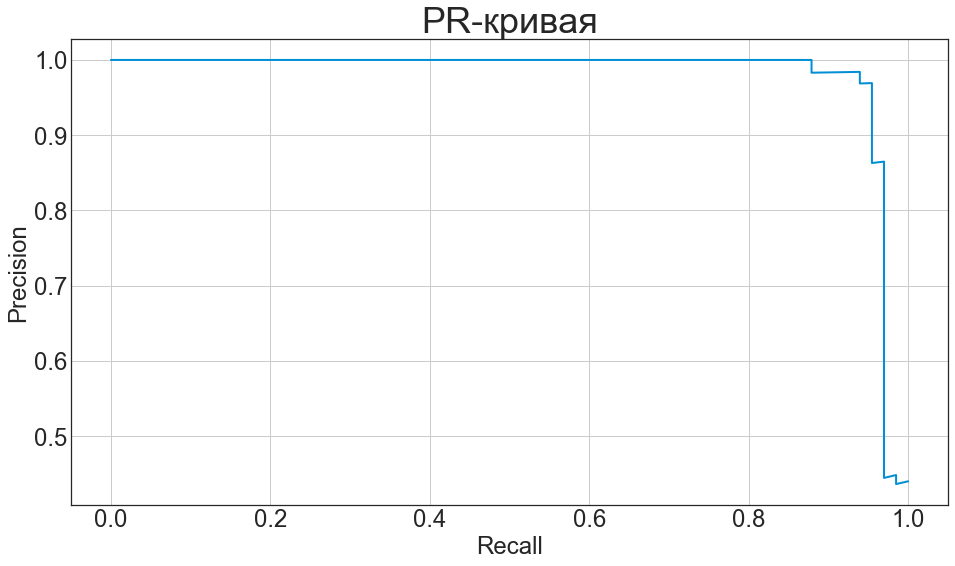

In [30]:
plt.figure(figsize=(14,8))
plt.plot(recall, precision)
plt.grid()
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title("PR-кривая")

In [31]:
acc = np.zeros(8)
for i, c in enumerate([0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]):
    temp_classifier = LogisticRegression(class_weight='balanced', C=c)
    temp_classifier.fit(X_train, np.ravel(y_train))
    y_predicted = temp_classifier.predict(X_test)
    acc[i] = metrics.accuracy_score(np.ravel(y_test), y_predicted)

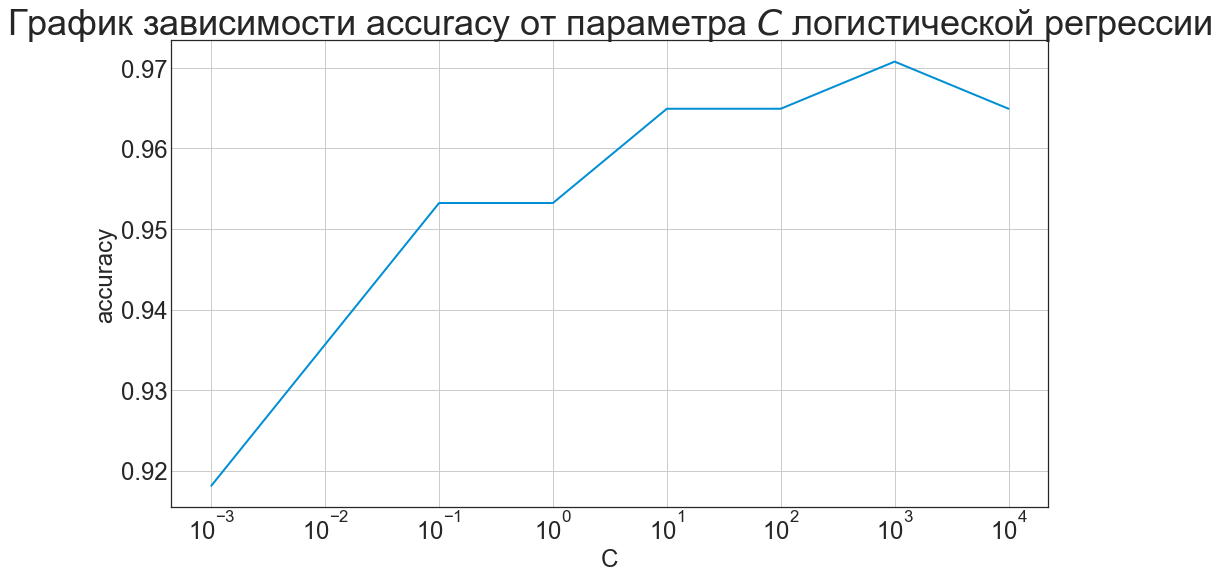

In [32]:
plt.figure(figsize=(14,8))
plt.plot([0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], acc)
plt.grid()
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("accuracy")
plt.title("График зависимости accuracy от параметра $C$ логистической регрессии")
plt.show()

In [33]:
temp_classifier = LogisticRegression(class_weight='balanced', C=best_param)
acc = np.zeros((y_train.size - 20, 7))
k = y_test.size // 7 + (y_test.size % 7 > 0)
for i in range(y_train.size - 20):
    temp_classifier.fit(X_train[:20 + i], np.ravel(y_train)[:20 + i])
    y_predicted = temp_classifier.predict(X_test)
    for j in range(7):
        acc[i][j] = metrics.accuracy_score((np.ravel(y_test))[k * j: k * (j + 1)], y_predicted[k * j: k * (j + 1)])

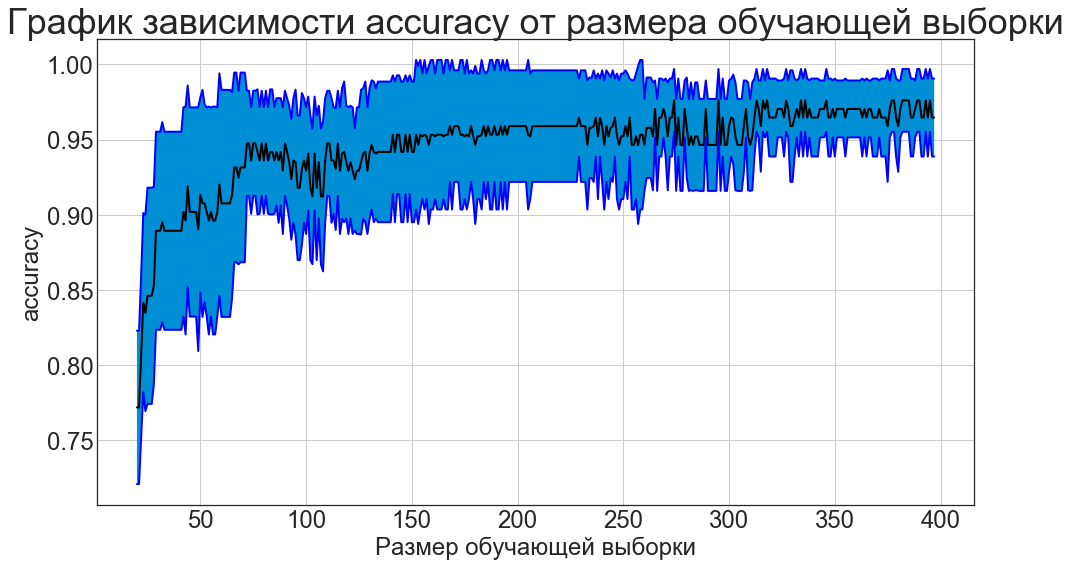

In [34]:
acc_mean = np.mean(acc, axis=1)
acc_std = np.std(acc, axis=1)
plt.figure(figsize=(14,8))
plt.plot(range(20, y_train.size), acc_mean, 'k-')
plt.plot(range(20, y_train.size), acc_mean - acc_std, 'b-')
plt.plot(range(20, y_train.size), acc_mean + acc_std, 'b-')
plt.fill_between(range(20, y_train.size), acc_mean - acc_std, acc_mean + acc_std)
plt.grid()
plt.xlabel("Размер обучающей выборки")
plt.ylabel("accuracy")
plt.title("График зависимости accuracy от размера обучающей выборки")
plt.show()

In [35]:
acc = np.zeros(40)
for i in range(40):
    temp_classifier = LogisticRegression(class_weight='balanced', C=best_param, max_iter=i)
    temp_classifier.fit(X_train, np.ravel(y_train))
    y_predicted = temp_classifier.predict(X_test)
    acc[i] = metrics.accuracy_score(np.ravel(y_test), y_predicted)

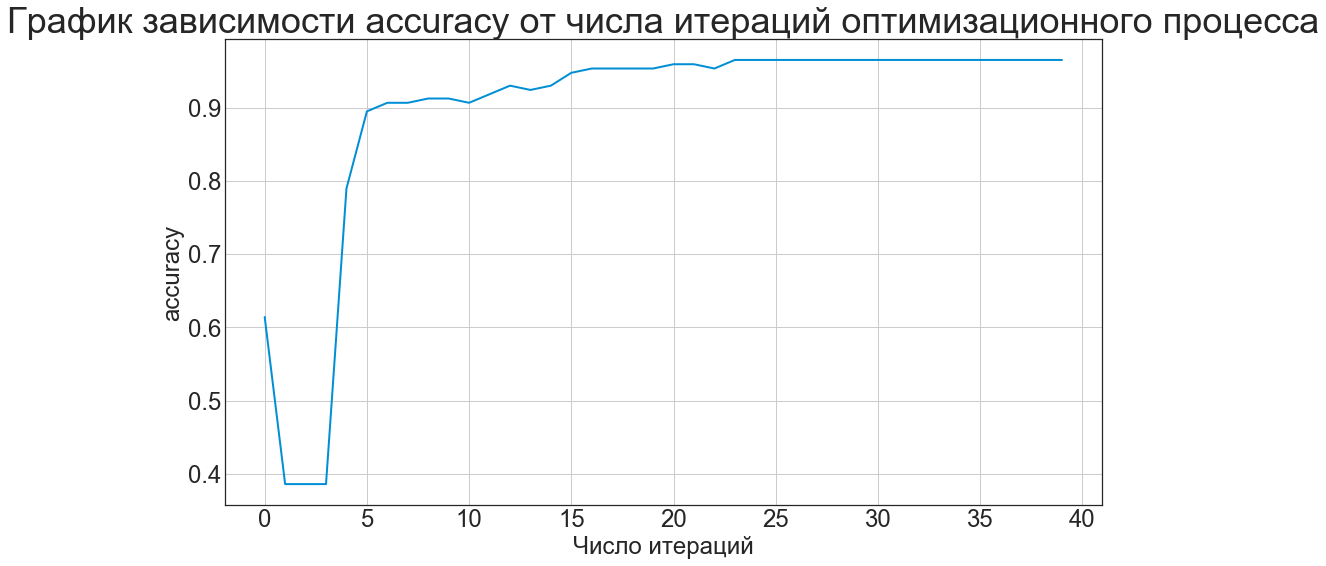

In [36]:
plt.figure(figsize=(14,8))
plt.plot(range(40), acc)
plt.grid()
plt.xlabel("Число итераций")
plt.ylabel("accuracy")
plt.title("График зависимости accuracy от числа итераций оптимизационного процесса")
plt.show()

### Нейронная сеть:

In [38]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [39]:
# one hot encode outputs
y_train_cat = np_utils.to_categorical(y_train)
y_test_cat = np_utils.to_categorical(y_test)
num_classes = y_test_cat.shape[1]

In [40]:
# define baseline model
def baseline_model(num_pixels, num_classes, neurons):
    # create model
    model = Sequential()
    model.add(Dense(neurons, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

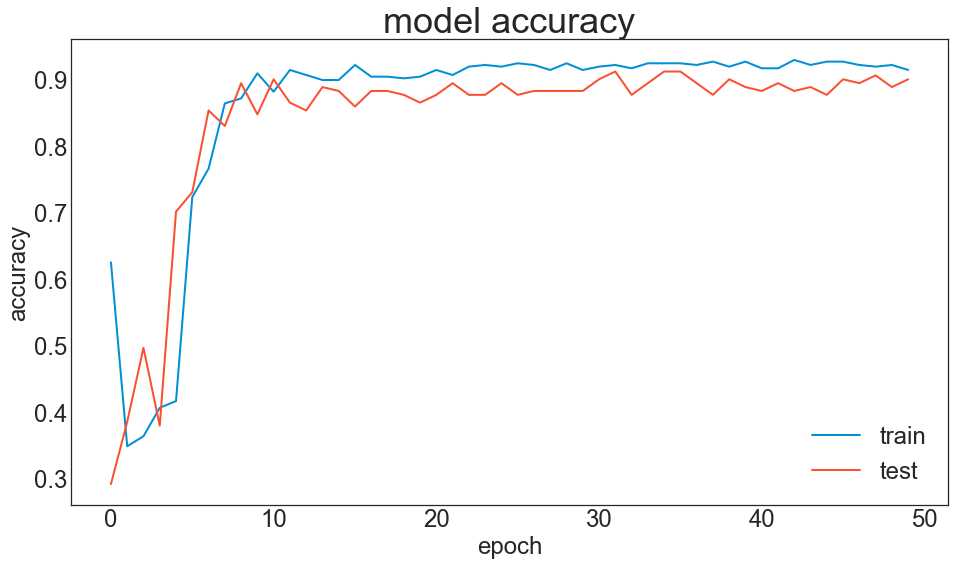

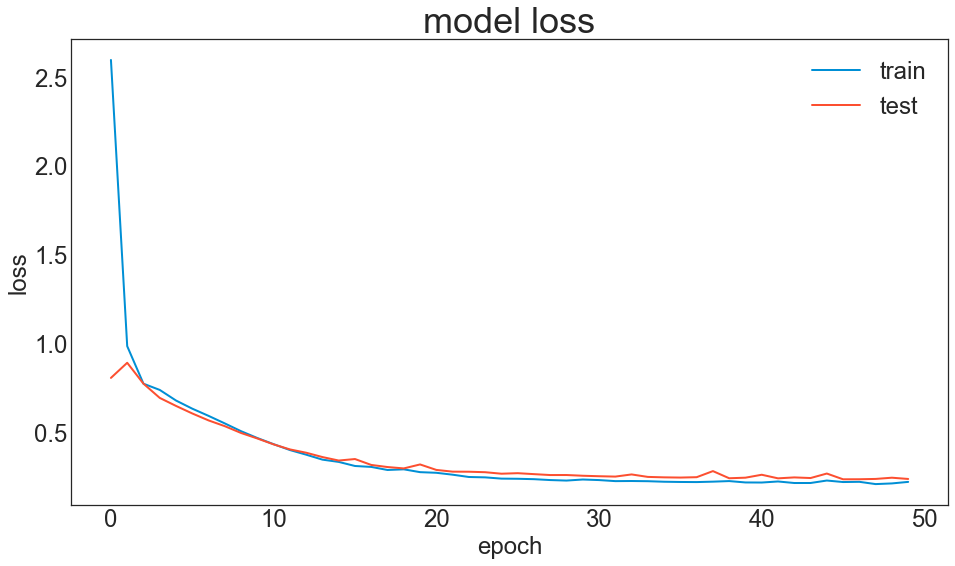

In [41]:
# build the model
model = baseline_model(np.shape(X)[1], num_classes, 10)
# Fit the model
history = model.fit(X_train, y_train_cat, validation_data=(X_test, y_test_cat), epochs=50, batch_size=30, verbose=0)
# Final evaluation of the model

# summarize history for accuracy
plt.figure(figsize=(14,8))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()
# summarize history for loss
plt.figure(figsize=(14,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

    
scores = model.evaluate(X_test, y_test_cat, verbose=0)

# print("Baseline Error: %.2f%%" % (100-scores[1]*100))   
pred_lbls = model.predict(X_test)

In [42]:
pred = np.argmax(pred_lbls, axis = 1)
y_prob = pred_lbls[:,1]

In [43]:
metrics.accuracy_score(np.ravel(y_test), pred)

0.9005847953216374

In [44]:
metrics.roc_auc_score(np.ravel(y_test), pred)

0.8880952380952382

Text(0.5,1,'ROC-кривая')

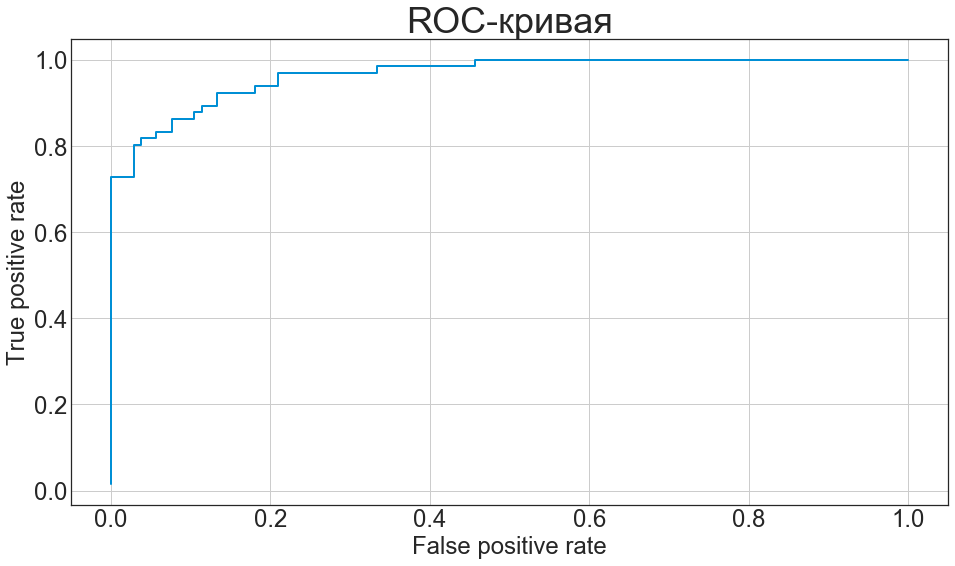

In [45]:
fpr, tpr, _ = metrics.roc_curve(np.ravel(y_test), y_prob)

plt.figure(figsize=(14,8))
plt.plot(fpr, tpr)
plt.grid()
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("ROC-кривая")

Text(0.5,1,'PR-кривая')

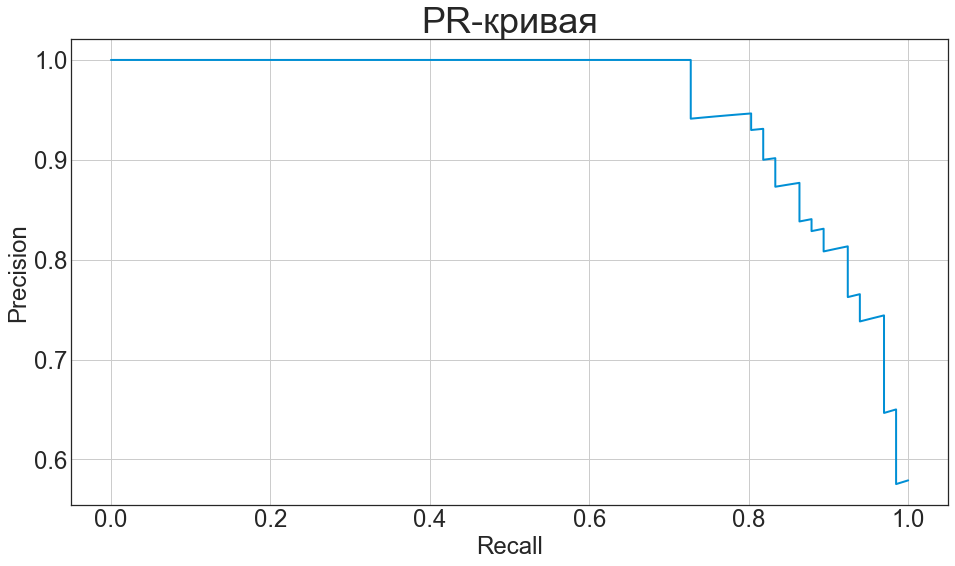

In [46]:
precision, recall, _ = metrics.precision_recall_curve(np.ravel(y_test), y_prob)
plt.figure(figsize=(14,8))
plt.plot(recall, precision)
plt.grid()
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title("PR-кривая")

In [49]:
hidden_neurons_num = [5, 10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
res_test_vec = list()

for nnum in hidden_neurons_num:
    model = baseline_model(np.shape(X)[1], num_classes, nnum)
    model.fit(X_train, y_train_cat, validation_data=(X_test, y_test_cat), epochs=50, batch_size=30, verbose=0)
    pred_lbls = model.predict(X_test)
    pred = np.argmax(pred_lbls, axis = 1)
    res_test_vec.append(metrics.accuracy_score(np.ravel(y_test), pred))

Text(0.5,1,'Зависимость accuracy от числа нейронов в скрытом слое')

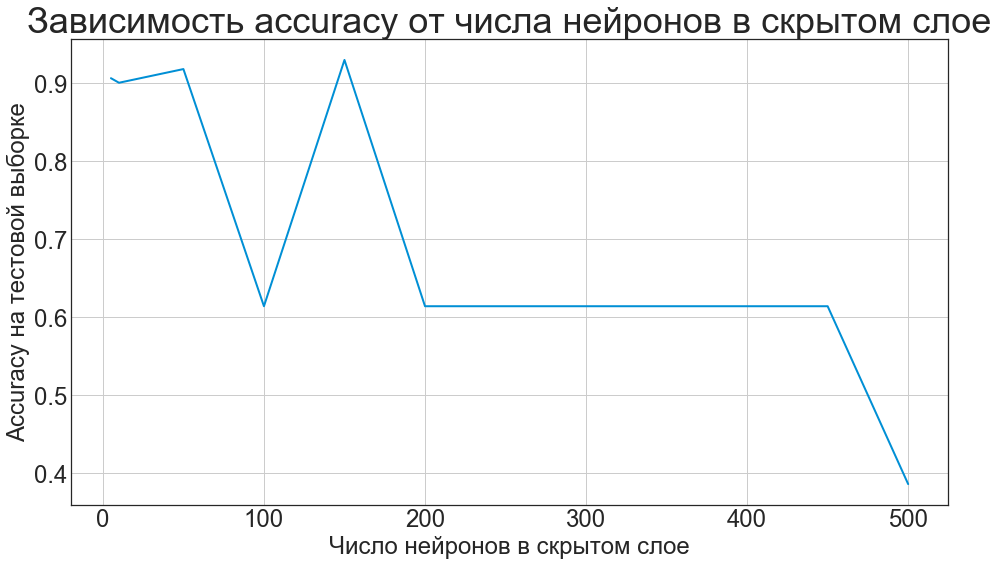

In [51]:
plt.figure(figsize=(14,8))
plt.grid()
plt.plot(hidden_neurons_num, res_test_vec)
plt.xlabel('Число нейронов в скрытом слое')
plt.ylabel('Accuracy на тестовой выборке')
plt.title('Зависимость accuracy от числа нейронов в скрытом слое')

Возьмем произвольным образом точки из обучающей выборки, размер выборки проварьируем от 20 до максимального размера обучающей выборки.

In [52]:
np.random.seed(7)
tr_sizes = [20*(i+1) for i in range(18)]
res_test_vec = np.zeros((len(tr_sizes), 7))

for i, tr in enumerate(tr_sizes):
    model = baseline_model(np.shape(X)[1], num_classes, 10)
    used_indices = np.random.choice(np.arange(X_train.shape[0]), tr, replace=False)

    model.fit(X_train[used_indices], y_train_cat[used_indices], 
              validation_data=(X_test, y_test_cat), epochs=50, batch_size=50, verbose=0)
    
    pred_lbls = model.predict(X_test)
    pred = np.argmax(pred_lbls, axis = 1)
    for j in range(7):
        res_test_vec[i][j] = metrics.accuracy_score(np.ravel(y_test[k * j: k * (j + 1)]), pred[k * j: k * (j + 1)])

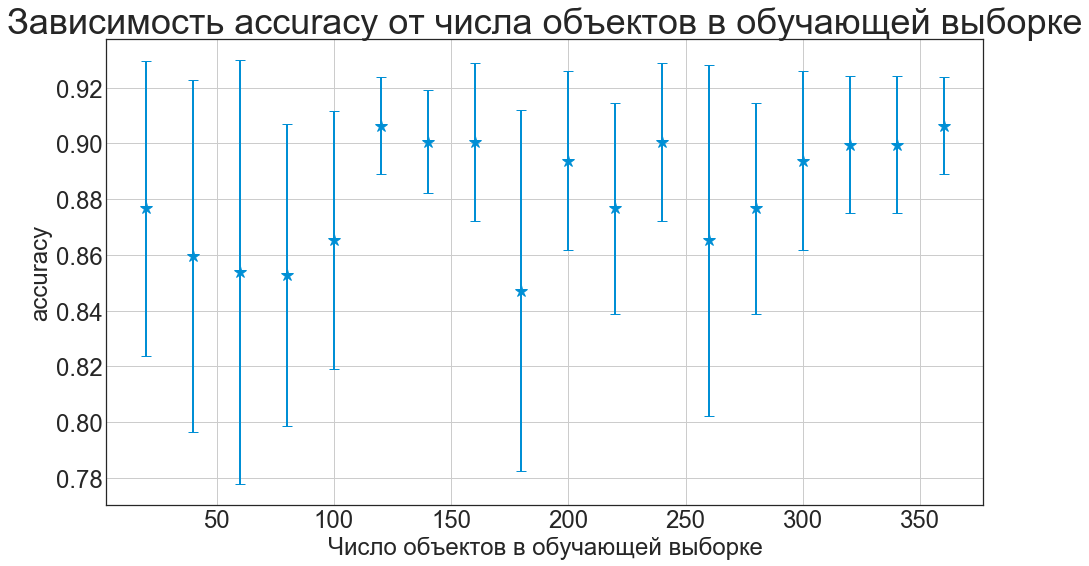

In [54]:
res_test_mean = np.mean(res_test_vec, axis = 1)
res_test_std = np.std(res_test_vec, axis = 1)
plt.figure(figsize=(14,8))
plt.errorbar(tr_sizes, res_test_mean, res_test_std, linestyle=' ', marker='*', capsize=5, label='Ошибка на тестовой выборке')
plt.grid()
plt.xlabel('Число объектов в обучающей выборке')
plt.ylabel('accuracy')
plt.title('Зависимость accuracy от числа объектов в обучающей выборке')
plt.show()

### Градиентный бустинг:

In [55]:
from sklearn.ensemble import GradientBoostingClassifier

В данном случае кросс валидацию выбираем на 3 фолда

In [56]:
param_grid = {'n_estimators': [70, 80, 90, 100, 120], 'learning_rate' : [0.1, 0.2, 0.3, 0.5],
              'max_depth' : [6, 7, 8, 9, 10, 12]} 
cv = 3

estimator = GradientBoostingClassifier()
optimizer = GridSearchCV(estimator, param_grid, cv = cv, scoring = 'accuracy', n_jobs=-1) 
optimizer.fit(X_train, np.ravel(y_train))
print('best_score', optimizer.best_score_)
print('best_params', optimizer.best_params_)

best_score 0.9321608040201005
best_params {'learning_rate': 0.2, 'max_depth': 8, 'n_estimators': 70}


Пробегая по сетке параметров, нашли оптимальные значения.

In [57]:
best_classifier = GradientBoostingClassifier(learning_rate=0.2, max_depth=8, n_estimators=70)
best_classifier.fit(X_train, np.ravel(y_train))

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=8,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=70,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [58]:
y_predicted = optimizer.predict(X_test)
y_prob = best_classifier.predict_proba(X_test)

In [59]:
metrics.accuracy_score(np.ravel(y_test), y_predicted)

0.9239766081871345

In [60]:
metrics.roc_auc_score(np.ravel(y_test), y_predicted)

0.9240259740259742

Text(0.5,1,'ROC-кривая')

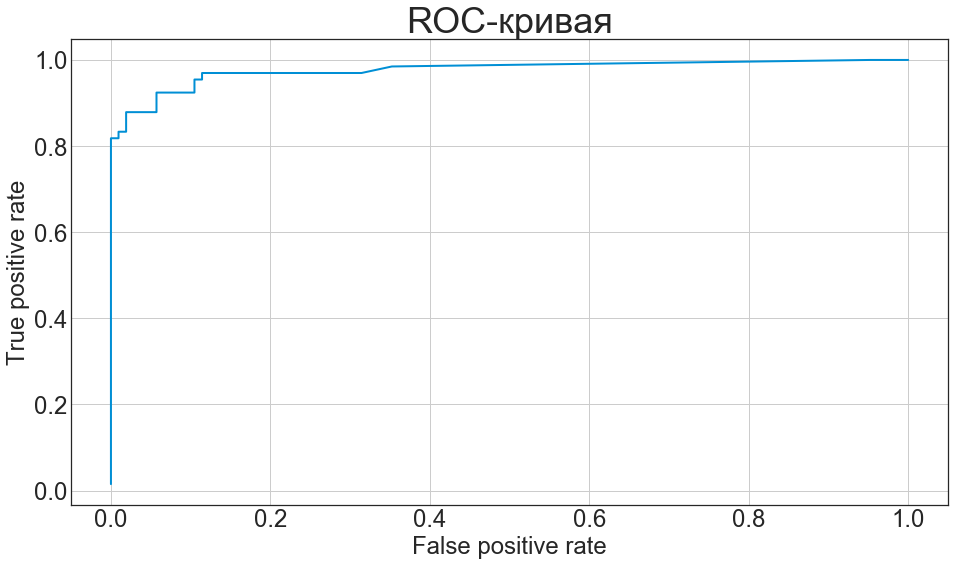

In [61]:
fpr, tpr, _ = metrics.roc_curve(np.ravel(y_test), y_prob[:, 1])

plt.figure(figsize=(14,8))
plt.plot(fpr, tpr)
plt.grid()
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("ROC-кривая")

Text(0.5,1,'PR-кривая')

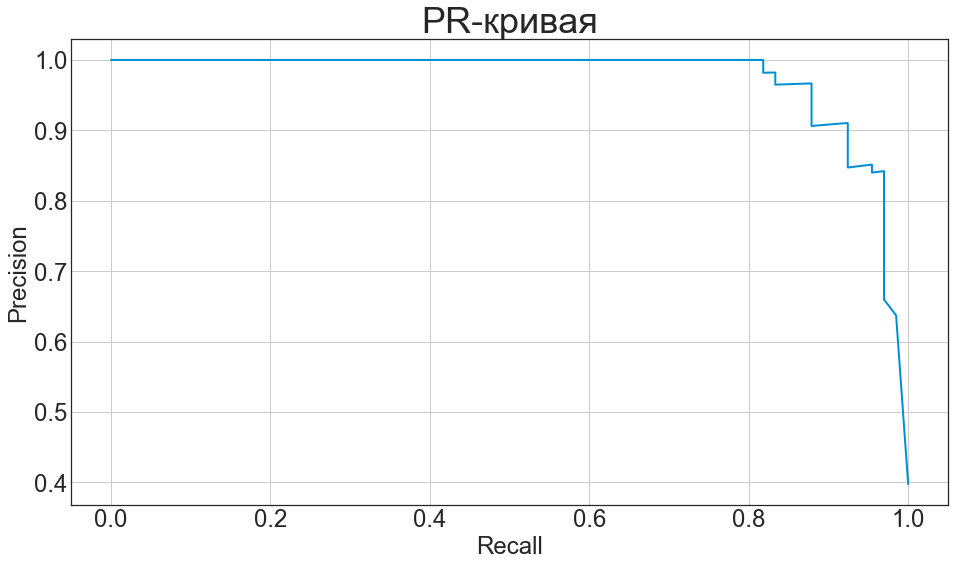

In [62]:
precision, recall, _ = metrics.precision_recall_curve(np.ravel(y_test), y_prob[:, 1])

plt.figure(figsize=(14,8))
plt.plot(recall, precision)
plt.grid()
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title("PR-кривая")

In [65]:
acc = np.zeros(7)
for i, learn in enumerate([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]):
    temp_classifier = GradientBoostingClassifier(learning_rate=learn, max_depth=8, n_estimators=70)
    temp_classifier.fit(X_train, np.ravel(y_train))
    y_predicted = temp_classifier.predict(X_test)
    acc[i] = metrics.accuracy_score(np.ravel(y_test), y_predicted)

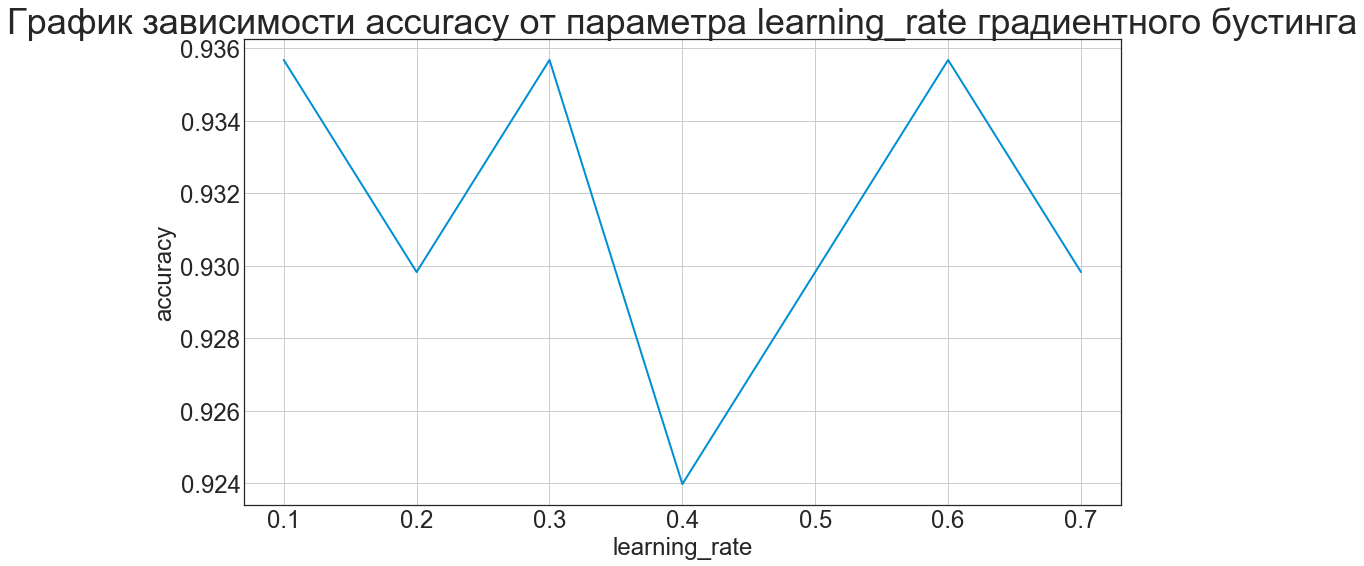

In [66]:
plt.figure(figsize=(14,8))
plt.plot([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7], acc)
plt.grid()
plt.xlabel("learning_rate")
plt.ylabel("accuracy")
plt.title("График зависимости accuracy от параметра learning_rate градиентного бустинга")
plt.show()

In [67]:
acc = np.zeros(6)
for i, depth in enumerate([6, 7, 9, 10, 11, 12]):
    temp_classifier = GradientBoostingClassifier(learning_rate=0.2, max_depth=depth, n_estimators=70)
    temp_classifier.fit(X_train, np.ravel(y_train))
    y_predicted = temp_classifier.predict(X_test)
    acc[i] = metrics.accuracy_score(np.ravel(y_test), y_predicted)

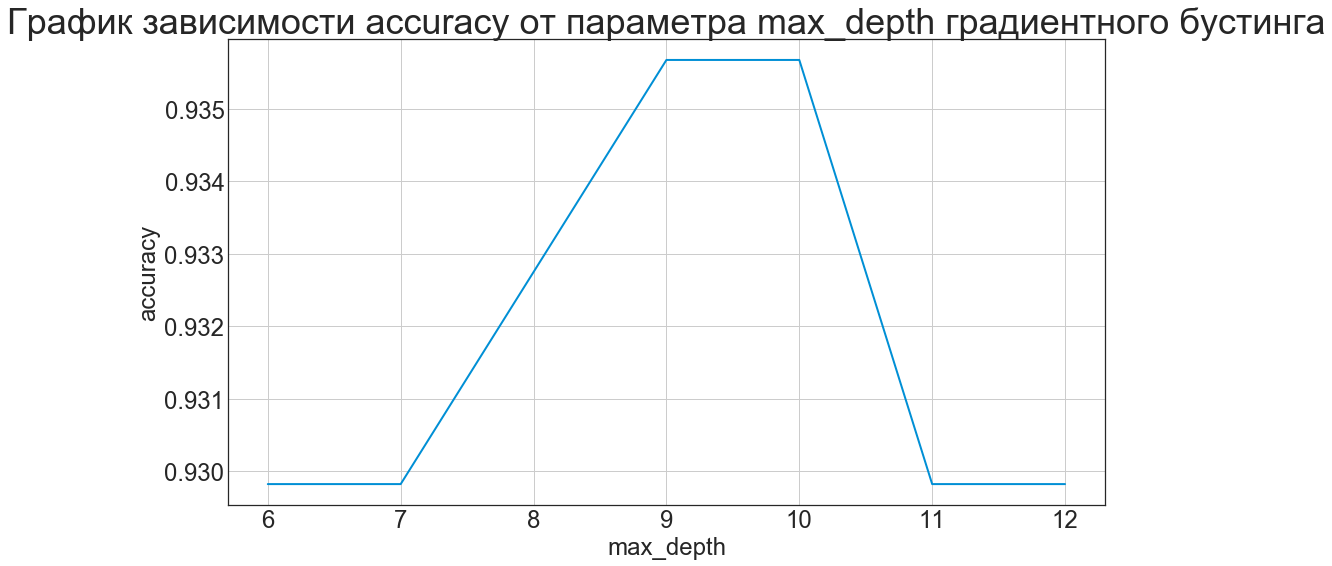

In [68]:
plt.figure(figsize=(14,8))
plt.plot([6, 7, 9, 10, 11, 12], acc)
plt.grid()
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.title("График зависимости accuracy от параметра max_depth градиентного бустинга")
plt.show()

In [69]:
acc = np.zeros(8)
for i, est in enumerate([30, 40, 50, 60, 70, 80, 90, 100]):
    temp_classifier = GradientBoostingClassifier(learning_rate=0.2, max_depth=8, n_estimators=est)
    temp_classifier.fit(X_train, np.ravel(y_train))
    y_predicted = temp_classifier.predict(X_test)
    acc[i] = metrics.accuracy_score(np.ravel(y_test), y_predicted)

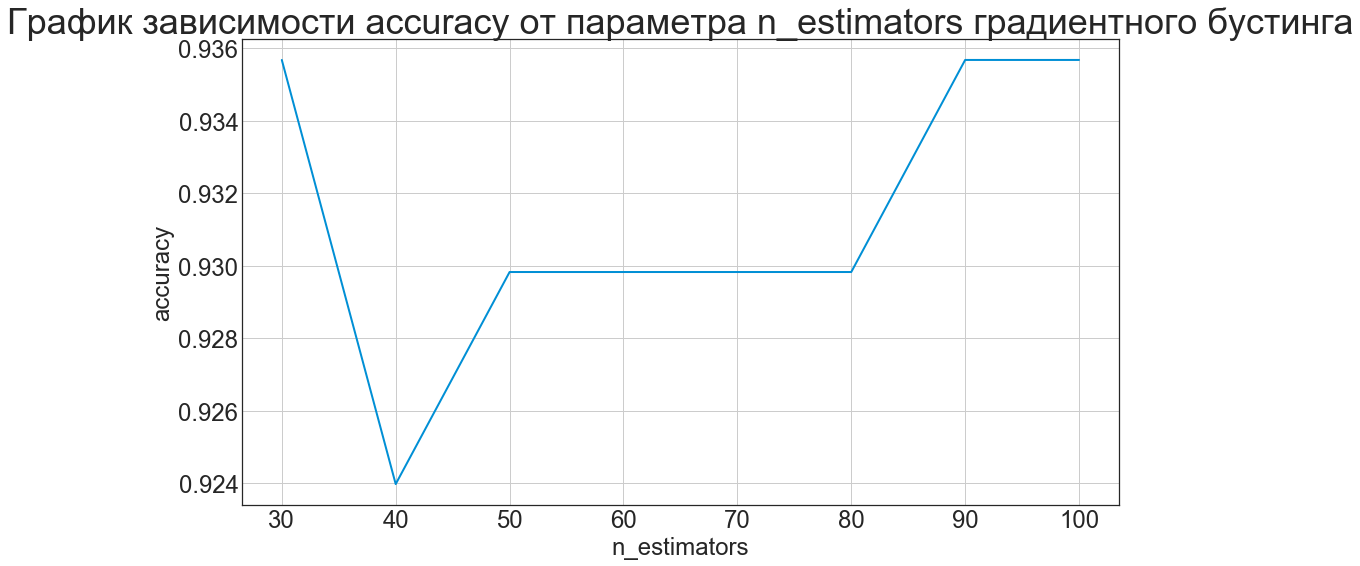

In [70]:
plt.figure(figsize=(14,8))
plt.plot([30, 40, 50, 60, 70, 80, 90, 100], acc)
plt.grid()
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.title("График зависимости accuracy от параметра n_estimators градиентного бустинга")
plt.show()

In [71]:
temp_classifier = GradientBoostingClassifier(learning_rate=0.2, max_depth=8, n_estimators=70)
acc = np.zeros((y_train.size - 20, 7))
k = y_test.size // 7 + (y_test.size % 7 > 0)
for i in range(y_train.size - 20):
    temp_classifier.fit(X_train[:20 + i], np.ravel(y_train)[:20 + i])
    y_predicted = temp_classifier.predict(X_test)
    for j in range(7):
        acc[i][j] = metrics.accuracy_score((np.ravel(y_test))[k * j: k * (j + 1)], y_predicted[k * j: k * (j + 1)])

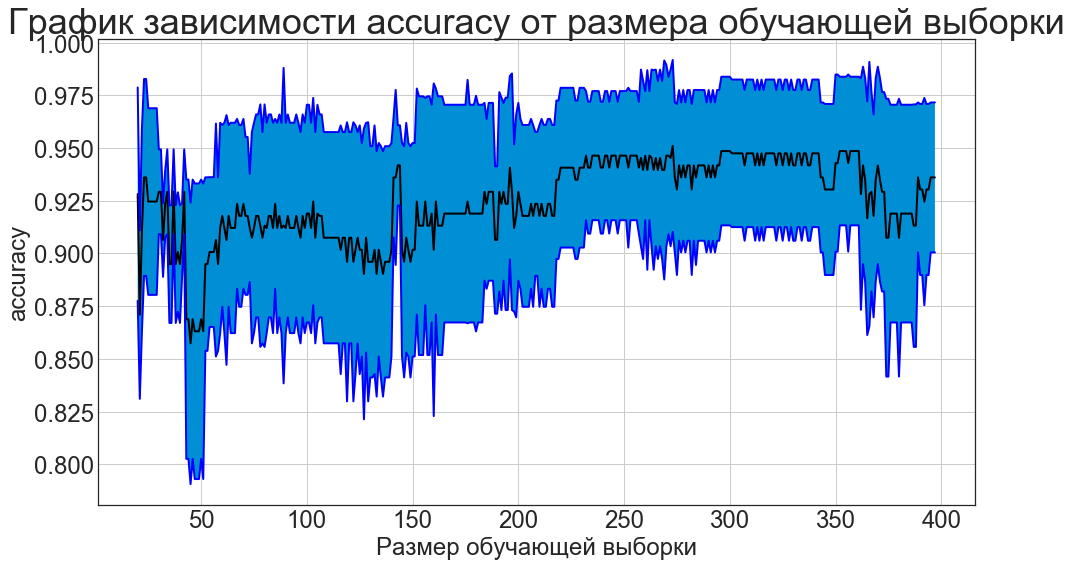

In [72]:
acc_mean = np.mean(acc, axis=1)
acc_std = np.std(acc, axis=1)
plt.figure(figsize=(14,8))
plt.plot(range(20, y_train.size), acc_mean, 'k-')
plt.plot(range(20, y_train.size), acc_mean - acc_std, 'b-')
plt.plot(range(20, y_train.size), acc_mean + acc_std, 'b-')
plt.fill_between(range(20, y_train.size), acc_mean - acc_std, acc_mean + acc_std)
plt.grid()
plt.xlabel("Размер обучающей выборки")
plt.ylabel("accuracy")
plt.title("График зависимости accuracy от размера обучающей выборки")
plt.show()